## SA - multi objective

teste de algorítimo multiobjetivo:

## function Bunh and Korn:

$$f(x,y) = 4 x^2 + y^2$$
$$f(x,y) = (x-5)^2 + (y-5)^2$$

#### Constraints:
$$g_1  (x,y) = (x-5)^2 +y^2 \leq 25$$
$$g_2 (x,y) =  (x-8)^2 + (y+3)^2 \geq 7.7$$

#### search domain: 
$$ 0 \leq x \leq 5$$
$$ 0 \leq y \leq 3 $$

In [12]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt
start = time.time()

### Variáveis relacionado a função

In [13]:
xmax=5
xmin=0
ymin=0
ymax=3

### Funções das equações da função

In [14]:
def f1(x,y): ## função a ser otimizado 1
    #x,y=np.hsplit(z, 2)
    obj = 4*x**2+4*y**2
    return obj

def f2(x,y): ##função a ser otimizado 2
    #x,y=np.hsplit(z,2)
    obj = (x-5)**2+(y-5)**2
    return obj

def g1(x,y): #restrição 1
    #x,y=np.hsplit(z,2)
    g=(x-5)**2+y**2
    if g <=25:
        aux=True
    else:
        aux = False
    return aux

def g2(x,y):#restrição 2
    #x,y=np.split(z,2)
    g=(x-8)**2+(y+3)**2
    if g>=7.7:
        aux=True
    else:
        aux=False
    return aux

### Funções para a otimização

inicializar uma array de solução

In [15]:
def maxmin(xficheiro, yficheiro):
    max1=max(f1(xficheiro, yficheiro))
    min1=min(f1(xficheiro, yficheiro))
    max2=max(f2(xficheiro, yficheiro))
    min2=min(f2(xficheiro, yficheiro))
    R1=max1-min1
    R2=max2-min2
    return R1, R2

#inicializa as soluções
#utilizado na função de criar archive
def intervalo(x,y, xls, xli, yls, yli):
    resp=None
    if (x>=xli and x<=xls) and (y>=yli and y<=yls):
        if g1(x, y) and g2(x, y):
            res=True
        else: 
            res= False
    else:
        res=False
    return res
#nova solução 
def nsol(xinicial, yinicial, phi,tam):
    aux=None
    aux2=None
    C=1
    xficheiro=np.empty([0], dtype=float)
    yficheiro=np.empty([0], dtype=float)  
    r=0
    for ii in range(tam):
        a=([-1,1])
        aux=xinicial+np.random.randint(xmax+1)*phi*C/2*np.random.choice(a)
        aux2=yinicial+np.random.randint(ymax+1)*phi*C/2*np.random.choice(a)
        if intervalo(aux, aux2, xmax,xmin, ymax, ymin):
            xficheiro=np.append(xficheiro, aux)
            yficheiro=np.append(yficheiro, aux2)
        else:
            C=-1
            aux=xinicial+np.random.rand()*phi*C
            aux2=yinicial+np.random.rand()*phi*C
            xficheiro=np.append(xficheiro, aux)
            yficheiro=np.append(yficheiro, aux2)
    r=np.random.choice(np.arange(xficheiro.size))
    fv1=f1(xficheiro, yficheiro)
    fv2=f2(xficheiro, yficheiro)
    return xficheiro[r], yficheiro[r], fv1[r] , fv2[r] 


In [16]:
def clust(tamanho, xficheiro, yficheiro):
    while xficheiro.size>tamanho:
        a=np.random.choice(np.arange(xficheiro.size))
        ff1=f1(xficheiro, yficheiro)
        ff2=f2(xficheiro, yficheiro)
        mvalue=300
        mindex=None
        for i in range(ff1.size):
            dif = math.sqrt((abs(xficheiro[a]-xficheiro[i]))**2+(abs(yficheiro[a]-yficheiro[i])))
            if dif !=0 and dif<mvalue:
                mvalue=dif
                mindex=i
        xficheiro=np.delete(xficheiro, mindex)
        yficheiro=np.delete(yficheiro, mindex)
    return xficheiro, yficheiro  

In [17]:
def dom(fun1,fun2,nfun1, nfun2, R1, R2):
    dif1=fun1-nfun1
    dif2=fun2-nfun2
    deltadom=0
    # intendcidade de dominancia
    if (fun1 !=nfun1  and fun2 !=nfun2):
        deltadom=abs(fun1-nfun1)/R1*abs(fun2-nfun2)/R2
    return deltadom      
def dominancia(fun1, fun2, nfun1, nfun2):
    cont_domina=0
    cont_ndom=0
    sit=None
    if (fun1<nfun1) and fun2<nfun2:
        #em Caso em que domina
        cont_domina=cont_domina+1
        sit=True
    else:
        contndom= cont_ndom + 1
        sit=False
    return sit
### acho que nem usei esta função verificar depois
def deltadomki(fun1, fun2, nfun1, nfun2, R1, R2):
    dom_k_j=0
    k=0
    for i in range(xficheiro.size):
        if (fun1<nfun1) and fun1[i]<nfun2:
            dom_k_j=dom_k_j+dom(fun1[i], fun2[i], nfun1, nfun2, R1, R2)
            k=k+1
    return dom_k_j, k



In [18]:
def iarch(tam, SL, xinicial, yinicial,phi,hcl):
    aux=None
    C=1
    xficheiro=np.empty([0], dtype=float)
    yficheiro=np.empty([0], dtype=float)
    cont=0
    cont2=0
    while cont<tam:
        a=([-1,1])
        xnovo=xinicial+phi*C*np.random.randint(xmax+1)/2
        ynovo=yinicial+phi*C*np.random.randint(ymax+1)/2
        aux=intervalo(xnovo,ynovo, xmax, xmin, ymax,ymin)
        if aux:
            xficheiro=np.append(xficheiro, xnovo)
            yficheiro=np.append(yficheiro, ynovo)
            #print("adicionado")
            xinicial=xnovo
            yinicial=ynovo
            cont=cont+1
            C=1
            phi=phi*0.9
        else:
            C=-1
            #print("não adicionado")     
    con=0
    con2=0
    #print("foi gerado ",xficheiro.size, "soluções")
    while cont2<=hcl:
        fun1 = f1(xficheiro, yficheiro)
        fun2=f2(xficheiro, yficheiro)
        r=np.random.choice(np.arange(fun1.size))
        #checagem se o mesmo esta fora da frente de pareto
        for ii in range(fun1.size):
            if fun1[r]<=fun1[ii] or fun2[r]<=fun2[ii]:
                con=con+1
            elif fun1[r]>fun1[ii] and fun2[r]>fun2[ii]:
                con2=con2+1
        if con<con2 or (fun1[r]==fun1[ii] and fun2[r]==fun2[ii]):
            xficheiro=np.delete(xficheiro, r)
            yficheiro=np.delete(yficheiro, r)
            #print("deletado")
        cont2=cont2+1
        if xficheiro.size<(SL+1):
            print("chegou ao limite")
            break

    fu1 = f1(xficheiro, yficheiro)
    fu2= f2(xficheiro, yficheiro)    
    return xficheiro, yficheiro, fu1,fu2
    

In [19]:
#inicialização das variáveis
Tmax=1000
Tmin=0.01
HL=150
HL2=HL*2
SL=50
N=300 #número domain search 
alpha= 0.85 # deaimento da temperatura ou fator de resfriamento
Hcl=100#hill climb quantidade de vez que verifi e elimina soluções desajustada
temp=Tmax
z=0.0001
valeax=np.random.rand()*z
valeay=np.random.rand()*z
phi=0.5#fator de redução

#Inicialização do archive
xficheiro, yficheiro, fvetor1, fvetor2=iarch(HL2,SL,valeax,valeay,phi,Hcl)
xficheiro, yficheiro=clust(HL,xficheiro, yficheiro)
r=np.random.choice(np.arange(xficheiro.size))
print(r)
#solução inicial 
x_i=xficheiro[r]
y_i=yficheiro[r]
f1c=fvetor1[r]
f2c=fvetor2[r]

C=1  #fator mudança de direção
#geração da nova solução


64


In [20]:
while(temp>Tmin):
    for o in range(N):
        R1,R2=maxmin(xficheiro, yficheiro) # do archive
        k=0
        k_nd=0 # soluções que não domina e também não é dominado
        k_dom=0 #quantidade de soluções que é dominado
        dom_k_i=0
        #reset dos contadores
        deltadom=0
        #geração da nova solução
        
        x_j, y_j, f1n, f2n =nsol(x_i, y_i,phi,xficheiro.size)
        
        fun1=f1(xficheiro, yficheiro)
        fun2=f2(xficheiro, yficheiro)
        
        for i in range(xficheiro.size):
            if fun1[i]<f1n and fun2[i]<f2n:
                k=k+1
                dom_k_i=dom_k_i+dom(fun1[i],fun2[i],f1n, f2n, R1, R2)
            if fun1[i]<f1n or fun2[i]<f2n:
                k_nd=k_nd+1
            else:
                k_dom=k_dom+1
       

        ############## Caso 1 ##################################################################
        if (f1c<f1n) and f2c<f2n:
            dom_i_j=dom(f1c,f2c,f1n,f2n, R1, R2)
            dom_avg=(dom_k_i+dom_i_j)/(k+1) 
            prob=1/(1+np.exp(dom_avg*temp))
            p=np.random.rand()
            if p<prob:
                x_i=x_j #a solução nova é atribuída ao corrente.
                y_i=y_j
                f1c=f1n
                f2c=f2n
                C=1
            else:
                C=-1
        ################################################################################################
        ################  caso 2 #######################################################################
        elif f1c<f1n or f1c<f2n:
            if (k>=1):
                deltadom_avg=dom_k_i/k
                prob=1/(1+np.exp(deltadom_avg*temp))
                p=np.random.rand()
                if p<prob:
                    x_i=x_j
                    y_j=y_j
                    f1c=f1n
                    f2c=f2n
                    C=1
                else:
                    x_i=x_i
                    y_i=y_i
                    C=-1
            elif (k_nd == xficheiro.size):  #as soluções do arquivo não domina e tabém não é dominado
                #print(Fore.BLUE, "as soluções do arquivo não domina e tabém não é dominado")
                x_i=x_j
                y_i=y_j
                f1c=f1n
                f2c=f2n
                xficheiro=np.append(xficheiro,x_j)
                yficheiro=np.append(yficheiro, y_j)
                if xficheiro.size>SL:
                    xficheiro, yficheiro=clust(HL,xficheiro, yficheiro)
                #clustering algorítimo 
            else: # a solução nova domina os pontos k
                #print(Fore.BLUE, "A solução nova domina os pontos k")
                x_i=x_j
                y_i=x_j
                f1c=f1n
                f2c=f2n
                xficheiro=np.append(xficheiro,x_j)
                yficheiro=np.append(yficheiro, y_j)
                contador=0
                ##### modifica
                estatus=None 
                while estatus==False:
                    posi=0
                    for i in range(ficheiro.size):
                        if f1c<fun1[i] and f2c<fun2[i]:
                            posi=i
                            estus=True
                        else:
                            estatus=False
                    if estatus:
                        xficheiro=np.delete(xficheiro, posi)
                        yficheiro=np.delete(yficheiro, posi)
                        fun1=np.delete(fun1, posi)
                        fun2=np.delete(fun2, posi)
                    #contador=contador+1
                #print(Fore.GREEN, "O tamanho do arquivo", archive.size)
        ################# caso 3##########################################################################
        else:
            #print(Fore.RED, "A solução nova domína a solução atual")# caso 3 (a) as soluções de k domina o novo ponto
            if k>=1: 
                #### necessário melhorar essa parte --- 1 check
                aux_d=np.empty([0])
                aux_d=(abs(f1n-fun1/R1)*((abs(f2n-fun2))/R2))
                menor=np.amin(aux_d)
                #print("o menor", menor)
                posi=np.argmin(aux_d)
                prob=1/(1+np.exp(-menor))
                #print(prob)
                if np.random.rand()<prob:
                    x_i=xficheiro[posi]
                    y_i=yficheiro[posi]
                    f1c=fun1[posi]
                    f2c=fun2[posi]
                else:
                    x_i=x_j
                    y_i=y_j
                    f1c=f1n
                    f2c=f2n
            elif k_dom>=1 and k==0 and k_nd == 0:  ###############  caso 3 (b) o novo ponto não domina e nem é dominado pelo arquivo
                #print("Teste da parte nova")
                lista=np.empty([0])
                xficheiro=np.append(xficheiro, x_j)
                yficheiro=np.append(yficheiro, y_j)
                for o in range(xficheiro.size):
                    if x_i == xficheiro[o] and y_i == yficheiro[o]:
                        lista= np.append(lista, o)
                for u in range(lista.size):
                    xficheiro=np.delete(xficheiro, lista[u])
                    yficheiro=np.delete(yficheiro, lista[u])
                if xficheiro.size>SL:
                    xficheiro, yficheiro=clust(HL, xficheiro, yficheiro)
                x_i=x_j
                y_i=y_j
                f1c=f1n
                f2c=f2n
                     
            else: ###############   caso 3 (c) Quando 
                x_i=x_j
                y_i=y_j
                f1c=f1n 
                f2c=f2n
                xficheiro=np.append(xficheiro, x_j)
                yficheiro=np.append(yficheiro, y_j)
                #print("CAso 3 (C)")
                contador=0
                ne=None
                while (ne!=False):
                    for uu in range(fun1.size):
                        if f1n<fun1[uu] and f2n<fun2[uu]:
                            ne=True
                            contador=uu
                        else:
                            ne=False
                    if ne:
                        xficheiro=np.delete(xficheiro, contador)
                        yficheiro=np.delete(yficheiro, contador)
                        fun1=np.delete(fun1, contador)
                        fun2=np.delete(fun2, contador)
                #while(contador < xficheiro.size):
                 #   if f1n<fun1[contador] and f2n<fun2[contador]:
                  #      xficheiro=np.delete(xficheiro, contador)
                   #     yficheiro=np.delete(yficheiro, contador)
                    #    contador=contador+1
                    #else:
                     #   contador=contador+1
        #print(k.size)
    temp=temp*alpha
    
if xficheiro.size>SL:
    xficheiro, yficheiro=clust(HL,xficheiro, yficheiro)
    print("clusterizado")
    fun1=f1(xficheiro, yficheiro)
    fun2=f2(xficheiro, yficheiro)

end=time.time()
print(end-start)
minu=np.around((end-start)/60,0)
sec=np.around((end-start)%60,0)
print(minu, "min", sec, "segundos")
print(xficheiro.size)

clusterizado
133.70370173454285
2.0 min 14.0 segundos
150


## Gráficos do front de pareto

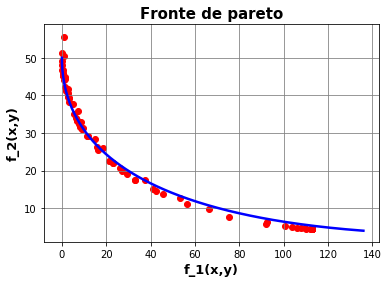

In [21]:
xg=np.linspace(0, 5,num=300)
yg=np.linspace(0, 3,num=300)
plt.plot(f1(xg,yg),f2(xg,yg), color='b',linewidth=2.5)
plt.xlabel("f_1(x,y)", fontsize=13,fontweight='bold')
plt.ylabel("f_2(x,y)",fontsize=13,fontweight='bold')
plt.title("Fronte de pareto",fontsize=15,fontweight='bold')
plt.scatter(fun1, fun2, color='red')
plt.grid(b=None, color='grey', which='major', axis='both')
nome="amosa-bird"
hora=str(int(end))
arquivo=nome+hora+".pdf"
plt.savefig(arquivo, format='pdf', dpi=600)

In [1]:
#plt.scatter(x, y, color='r')
#plt.title("Soluções do archive")

## Hipervolume